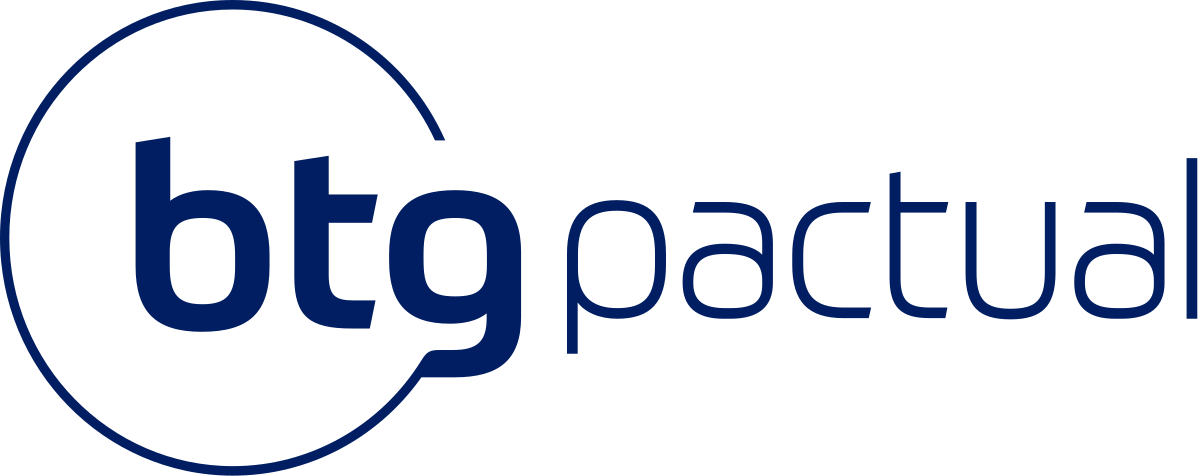

# **BTG ANALYTICS** - *Open Finance, Exclusive Data*


**### Faca upload do arquivo bruto no "link do github":**


---
* raw_table_final.csv
* account_transactions_final.csv




In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving account_transactions_final.csv to account_transactions_final (1).csv
Saving raw_table_final.csv to raw_table_final (1).csv
User uploaded file "account_transactions_final.csv" with length 51487941 bytes
User uploaded file "raw_table_final.csv" with length 32929 bytes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

0                         Farmácia
1                     Supermercado
2         Aplicativo de Transporte
3                             IPTU
4                      Alimentação
                    ...           
258896                     Pedágio
258897                   Decoração
258898                        Taxi
258899                     Aluguel
258900                 Restaurante
Name: transactionName, Length: 258901, dtype: object
Lista de tipos de transações: 
[]


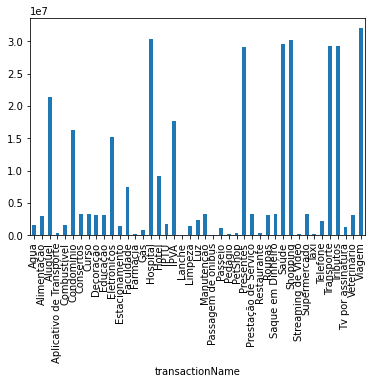

In [ ]:
data= pd.read_csv("account_transactions_final.csv")

def load_full_transactions_char():
    df = data.groupby(['transactionName'])['amount'].sum()
    df.plot(kind='bar')
    plt.show()
    
load_full_transactions_char()

Pela análise acima, nós conseguimos ver que o tipo de gasto mais comum é da categoria "Telefone" (4.66% do total). Assim, podemos fazer uma pesquisa mais aprofundada de que tipo de pessoas gastam mais nisso e que tipo de táctica comercial (parcerias, por exemplo) poderia ser usada para essas pessoas.

In [ ]:

def load_request_accounts(transaction_type, range_requested):
    df= pd.read_csv("brasa_account_transactions.csv")
    df =df.loc[df['transactionName'] == transaction_type]
    #df = data.groupby(['customerId'])['amount'].sum() 
    df = df.sort_values(by=['amount'], ascending=False)

    count_row = df.shape[0]
    final_length = int((range_requested / 100) * count_row)
    filtered_accounts = []
    
    for i in range(final_length):
        cell = df.iloc[i]['customerId']
        if cell not in filtered_accounts:
             filtered_accounts.append(cell)
    return filtered_accounts


Nessa função, podemos pegar os top 20% das pessoas que fizeram compras de Telefone e analisar eles. 

In [ ]:
def plot_location(filtered_accounts):
    print(len(filtered_accounts))
    data= pd.read_csv("brasa_raw_table.csv")
    data = data.loc[data['customerId'].isin(filtered_accounts)]
    df = data.groupby(['contacts__postalAddresses__countrySubDivision'])['customerId'].count() 
    df.plot(kind='pie')
    
filtered_accounts = load_request_accounts('Telefone', 20)
plot_location(filtered_accounts)

In [ ]:
def plot_sex(filtered_accounts):
    data= pd.read_csv("brasa_raw_table.csv")
    df = data.groupby(['sex'])['customerId'].count() 
    df.plot(kind = 'pie')
    
filtered_accounts = load_request_accounts('Luz', 20)
plot_sex(filtered_accounts)
